In [51]:
import time
import os
import sys

from pathlib import Path

import numpy as np
import matplotlib
matplotlib.use('nbagg')
#from matplotlib import style
#style.use('ggplot')
import matplotlib.pyplot as plt

from astroscrappy import detect_cosmics
import photutils 

from scipy.ndimage import median_filter

import astropy.units as u
from astropy import stats
from astropy.io import fits
%cd /Users/tim/MMT/skycam

/Users/tim/MMT/skycam


In [3]:
%load_ext autoreload
%autoreload 2

In [7]:
p = Path(".")

In [11]:
ims = []
for f in sorted(p.glob("image_00004*")):
    h = fits.open(f)
    ims.append(h[-1].data)

<IPython.core.display.Javascript object>


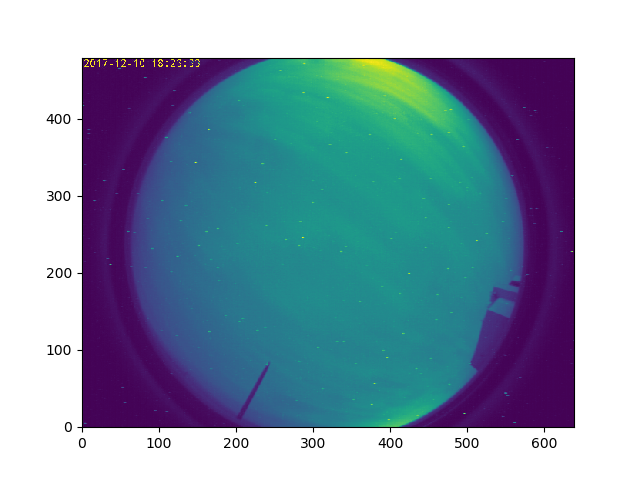

In [16]:
med = np.median(np.array(ims), axis=0)
plt.imshow(med, origin="lower")
plt.show()

In [43]:
cr_mask, data = detect_cosmics(med, sigclip=1, objlim=2.0, niter=30, cleantype='medmask', psffwhm=2)

<IPython.core.display.Javascript object>


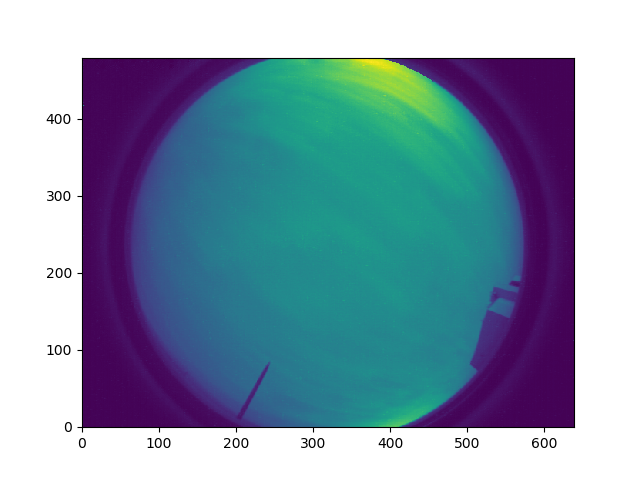

In [44]:
plt.imshow(data, origin="lower")
plt.show()

<IPython.core.display.Javascript object>


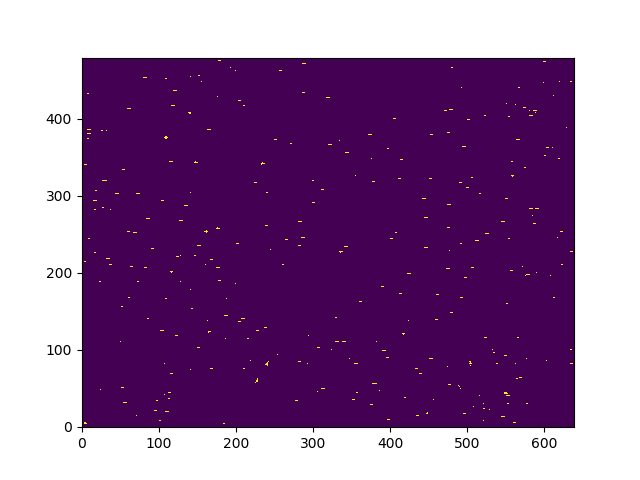

In [50]:
cr_mask[445:477, 391:458] = False
cr_mask[465:, :153] = False
plt.imshow(cr_mask, origin="lower")
plt.show()

In [47]:
cr_mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

<IPython.core.display.Javascript object>


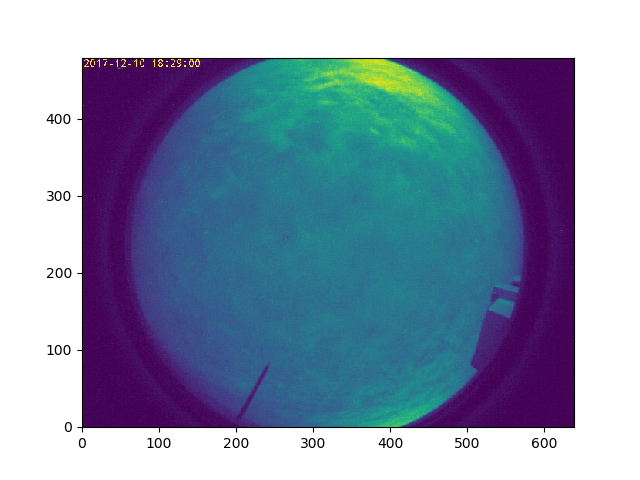

In [56]:
test_im = fits.open("image_0000481.fits.gz")[-1].data
blurred = median_filter(test_im, size=5)
test_im[cr_mask] = blurred[cr_mask]
plt.imshow(test_im, origin="lower")
plt.show()

In [60]:
fits.writeto("mask.fits", cr_mask.astype(int))

In [61]:
m = fits.open("mask.fits")[-1].data.astype(bool)

In [62]:
m

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)